In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Brief description of the data set and a summary of its attributes:
Delhivery is a prominent logistics and supply chain services company in India, known for its extensive reach and efficient delivery solutions, leveraging advanced technology to ensure timely and reliable deliveries across various regions. Analyzing this dataset offers valuable insights into Delhivery's logistics operations, revealing details about trip efficiency, route optimization, transportation types, and delivery performance. It provides a comprehensive understanding of trip scheduling, execution, factors affecting delivery times, and route optimization using open-source routing engines. This extensive dataset is crucial for improving logistics strategies, enhancing delivery performance, and making informed decisions in supply chain management. The company seeks assistance in data cleaning, manipulation, and analysis to extract useful features, support accurate forecasting models, and process data from its engineering pipelines.

In [132]:
# Read the CSV file into a DataFrame
df = pd.read_csv('delhivery.csv')
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


In [133]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [134]:
features = df.columns
features

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [136]:
# Display summary of missing values
missing_values = df.isnull().sum()
print('Missing Values Summary:')
print(missing_values)

Missing Values Summary:
data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64


In [137]:
df = df.dropna()

In [138]:
# Separate column names by data type
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns.tolist()

# Print the results
print("Numeric columns:", numeric_columns)
print("\nCategorical columns:", categorical_columns)
df.shape

Numeric columns: ['start_scan_to_end_scan', 'cutoff_factor', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance', 'segment_factor']

Categorical columns: ['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type', 'trip_uuid', 'source_center', 'source_name', 'destination_center', 'destination_name', 'od_start_time', 'od_end_time', 'is_cutoff', 'cutoff_timestamp']


(144316, 24)

# Initial plan for data exploration

For the initial plan of data exploration, we will create histograms, boxplots, a scatter plot comparing osrm_time and actual_time, kernel density estimation (KDE) plots, and a correlation matrix for all numerical features.


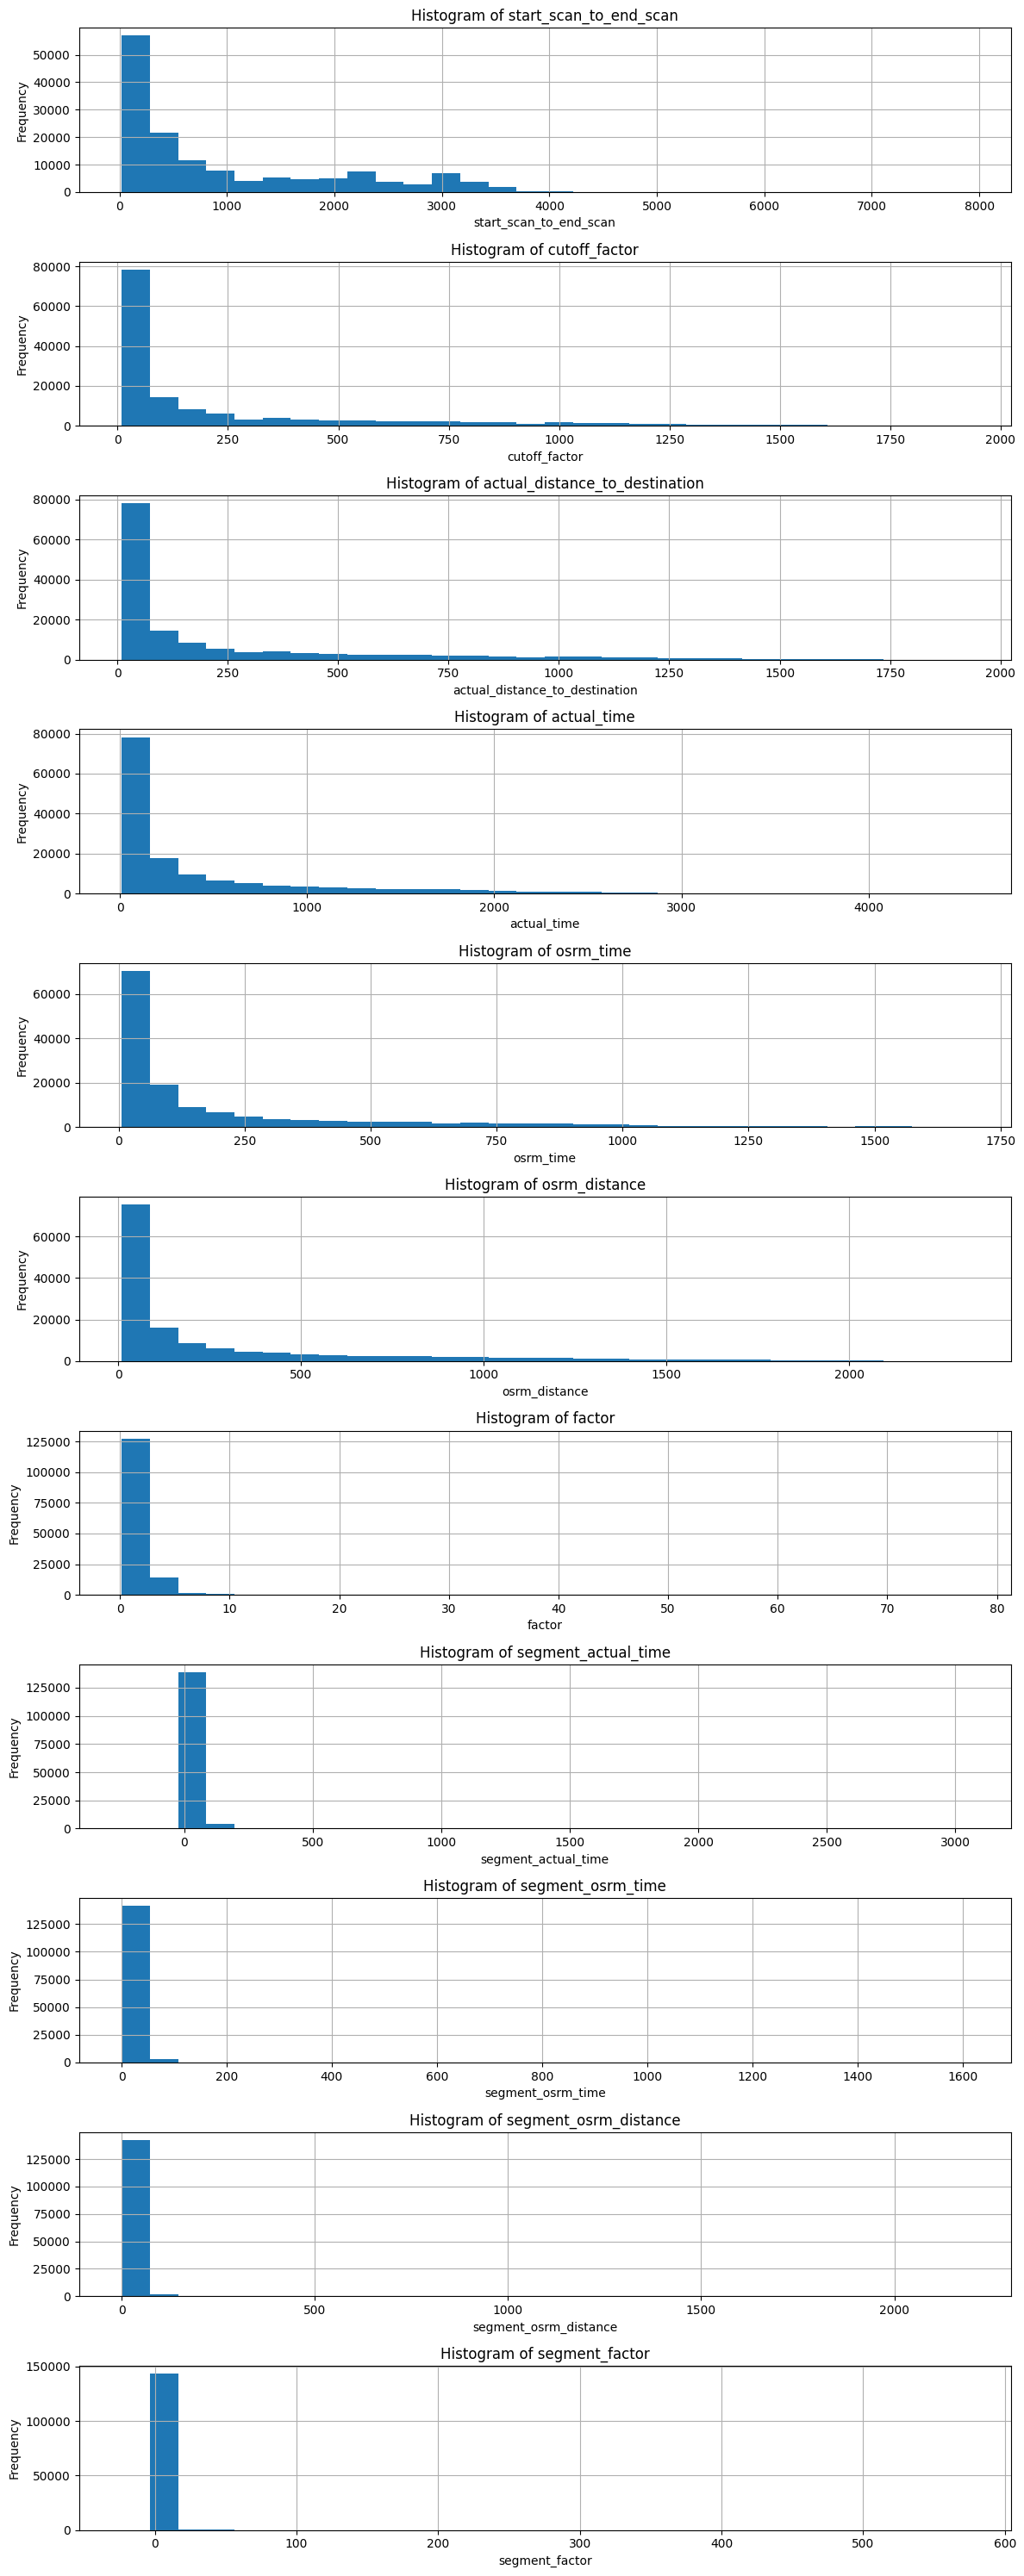

In [139]:
fig, axes = plt.subplots(11, 1, figsize=(12, 30))

for i, c in enumerate(numeric_columns):
    df[c].hist(ax=axes[i], bins=30)
    axes[i].set_title(f'Histogram of {c}')
    axes[i].set_xlabel(c)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

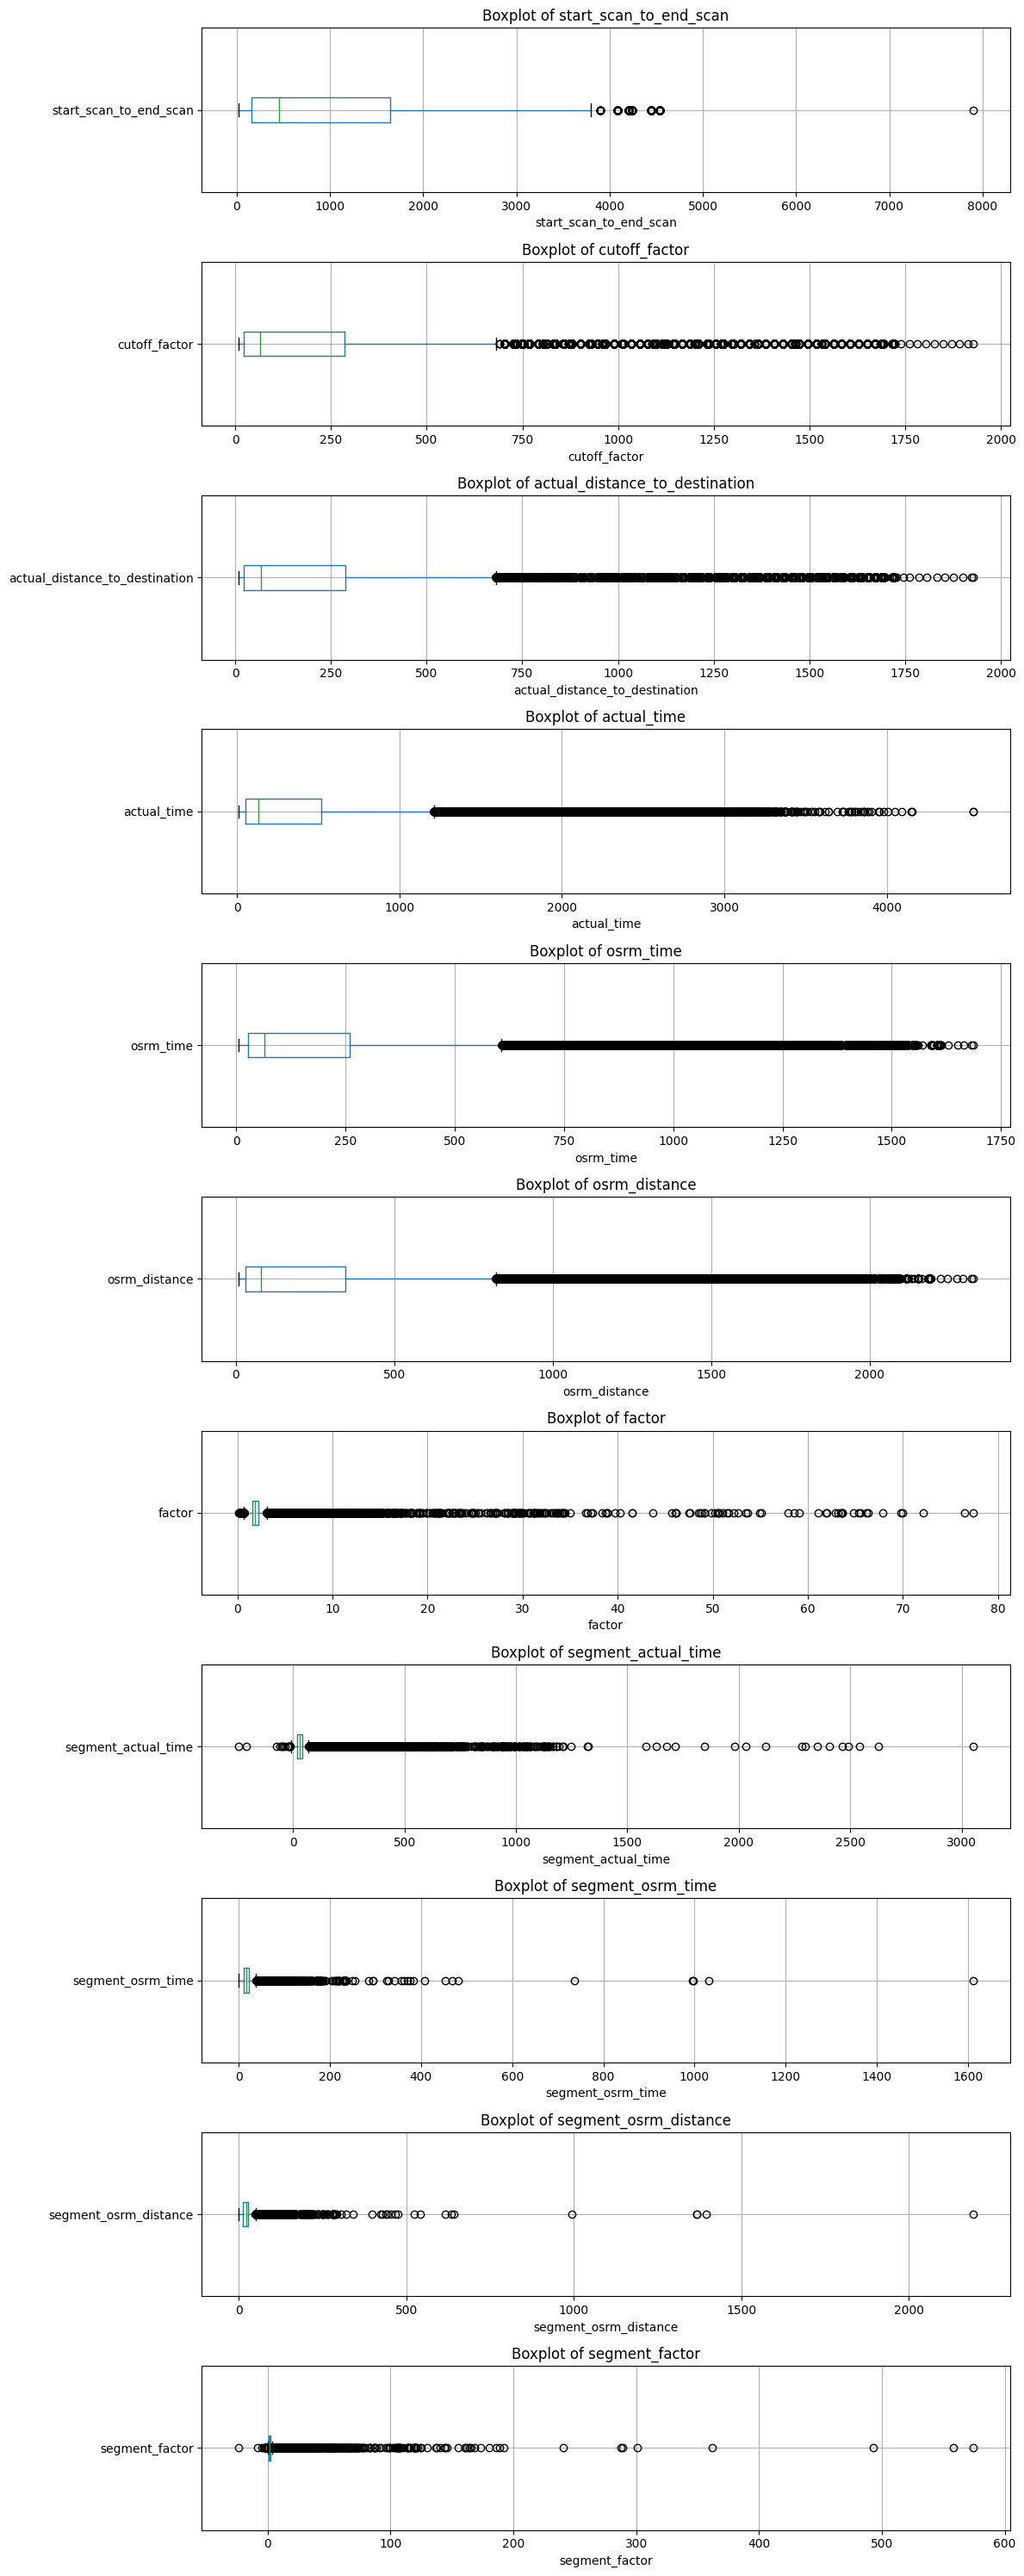

In [140]:
fig, axes = plt.subplots(11, 1, figsize=(12, 30))

for i, c in enumerate(numeric_columns):
    df.boxplot(column=c, ax=axes[i], vert=False)
    axes[i].set_title(f'Boxplot of {c}')
    axes[i].set_xlabel(c)

plt.tight_layout()
plt.show()

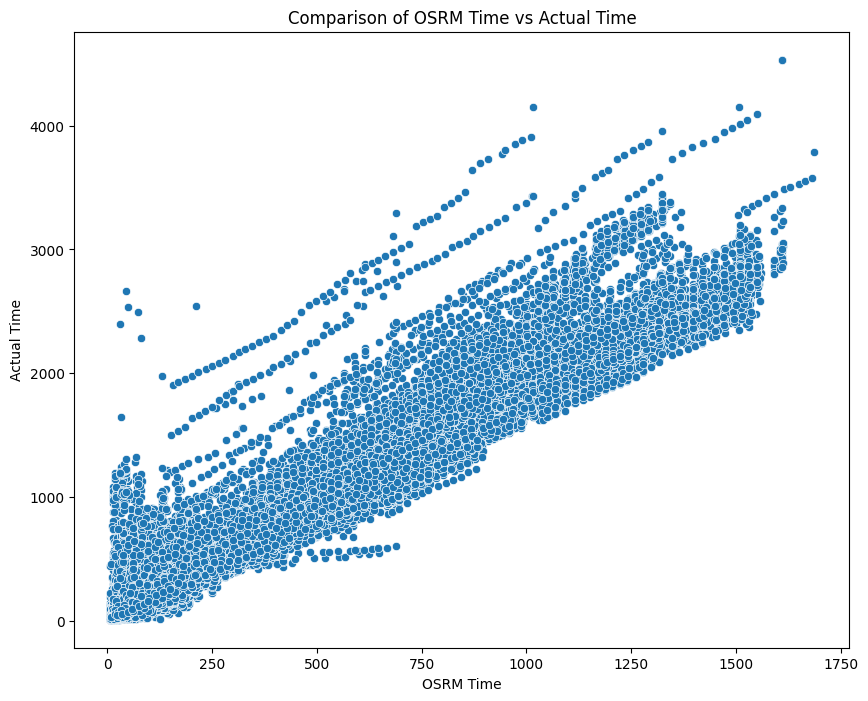

In [141]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='osrm_time', y='actual_time')
plt.title('Comparison of OSRM Time vs Actual Time')
plt.xlabel('OSRM Time')
plt.ylabel('Actual Time')
plt.show()

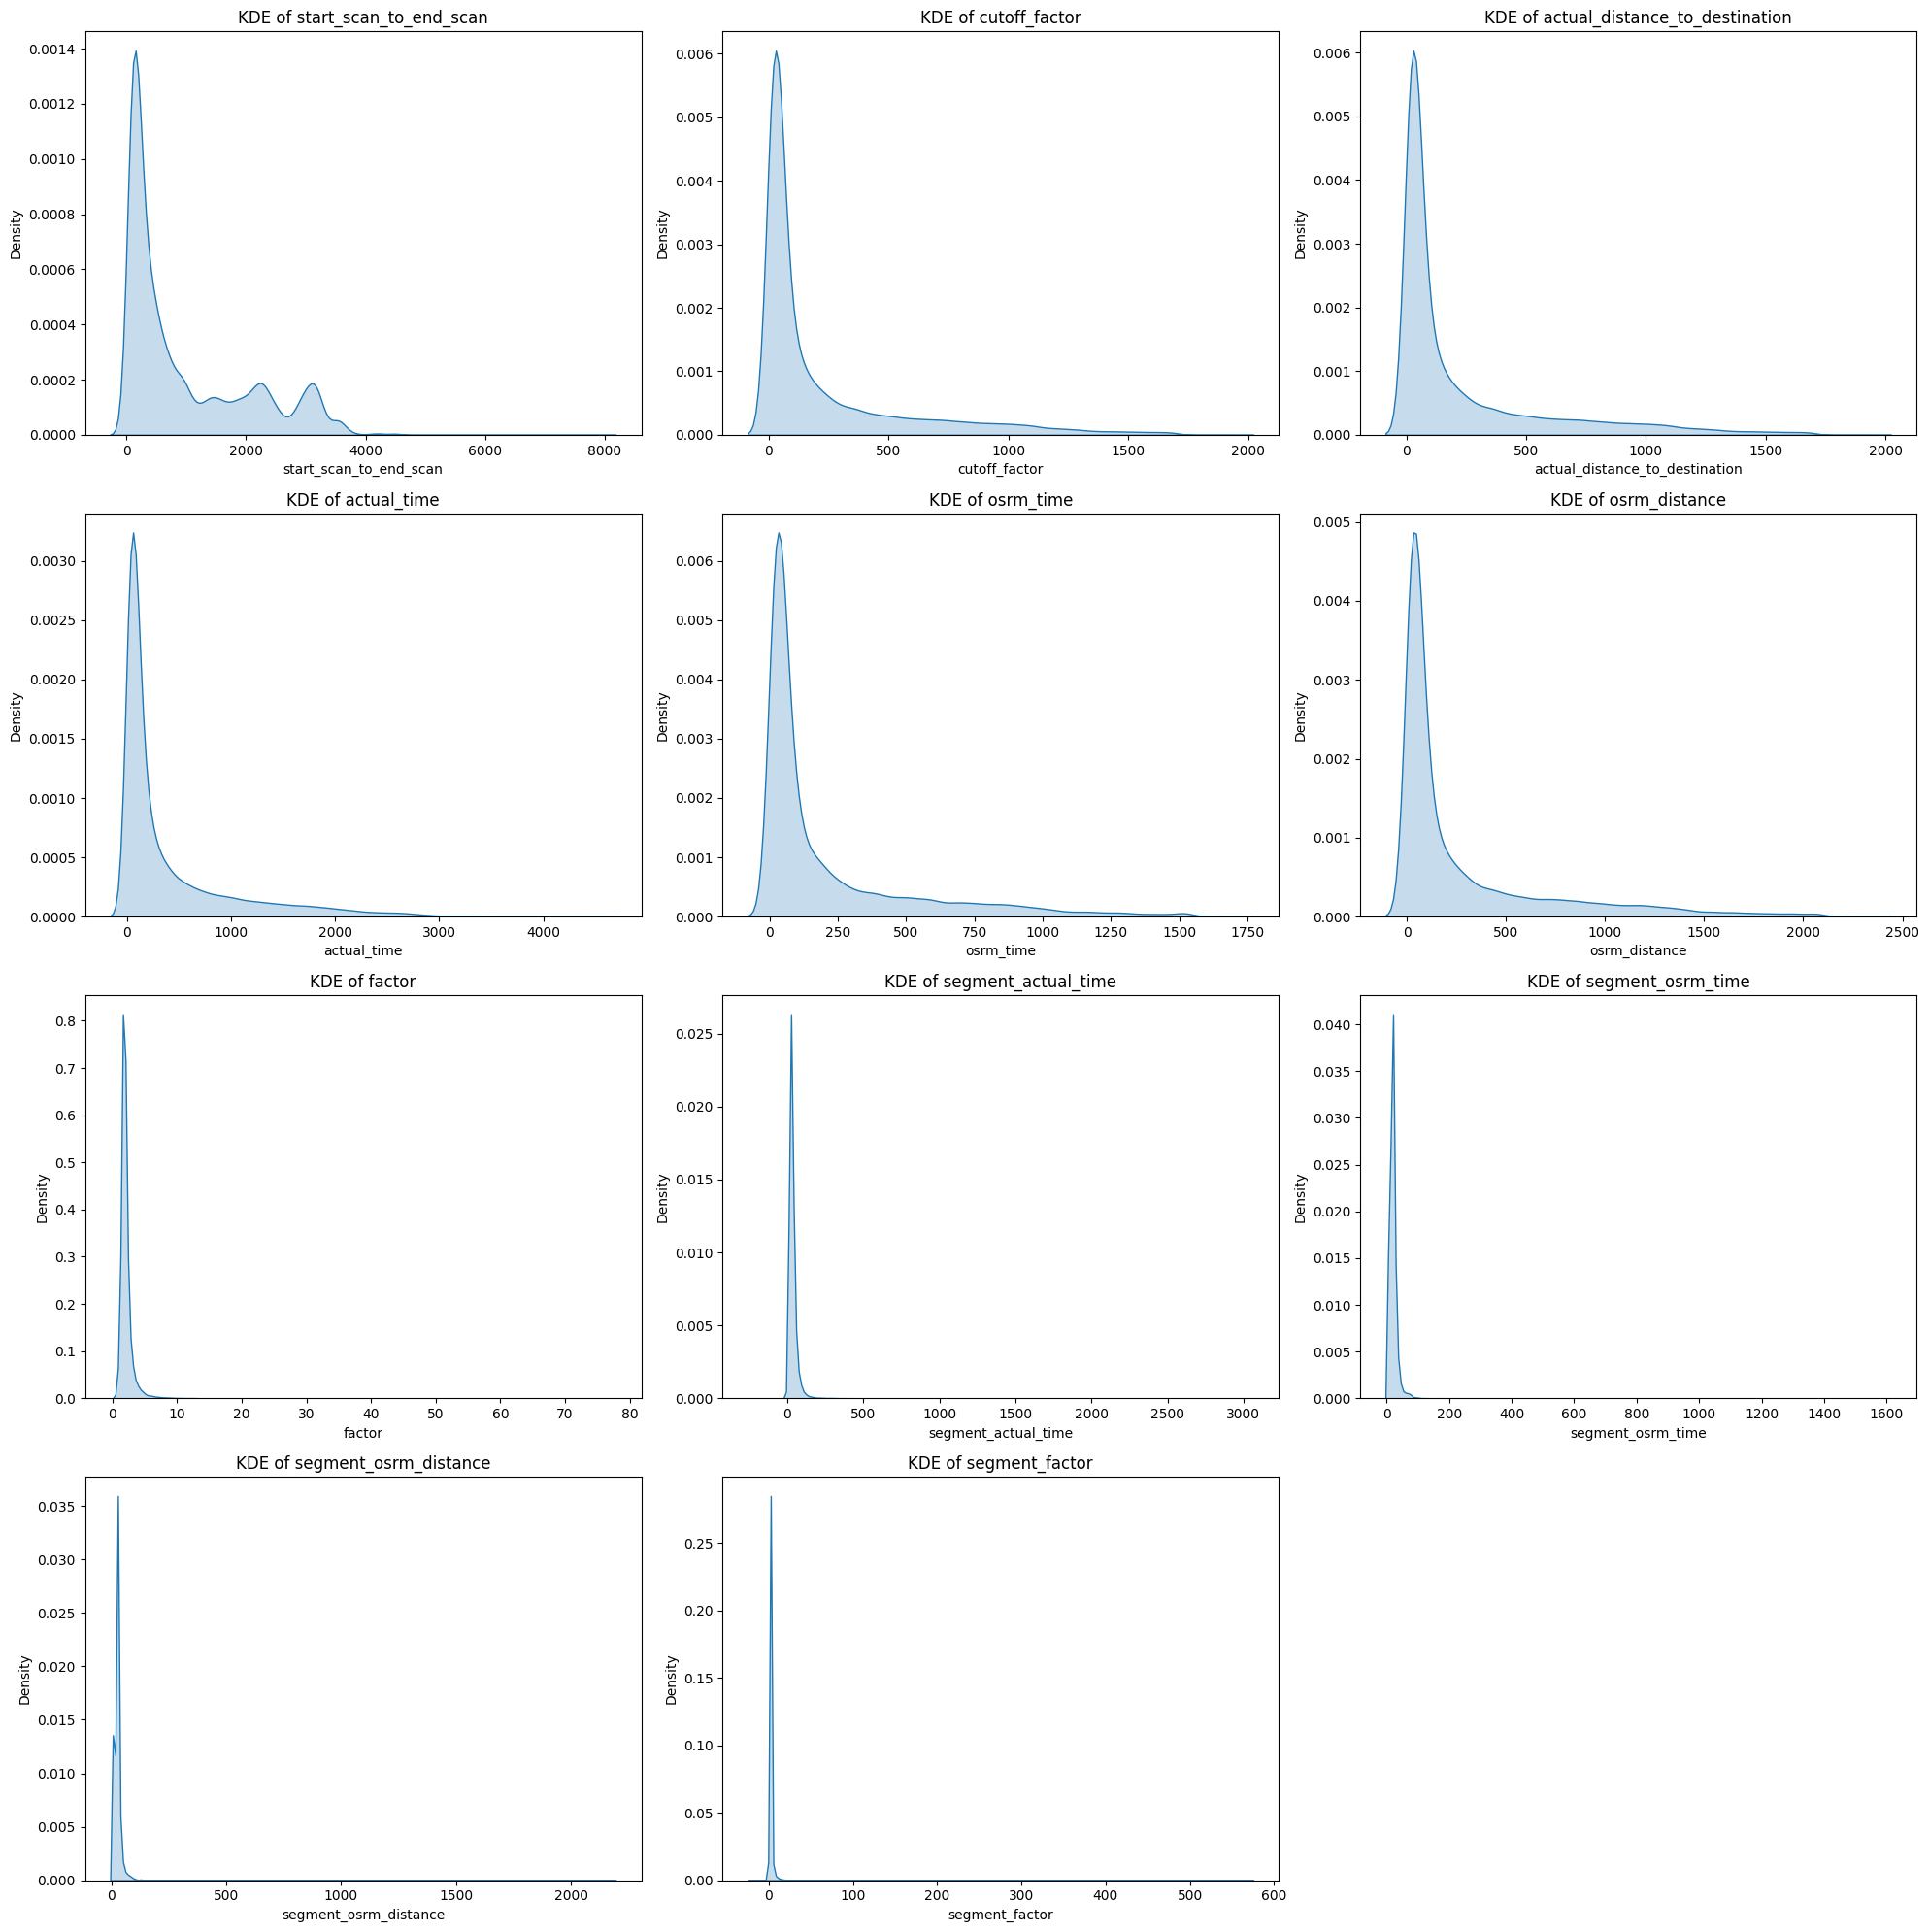

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
axes = axes.flatten()

# Create KDE plots for each numeric column
for i, column in enumerate(numeric_columns):
    sns.kdeplot(data=df[column], ax=axes[i], fill=True)
    axes[i].set_title(f'KDE of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Actual time is the target variable


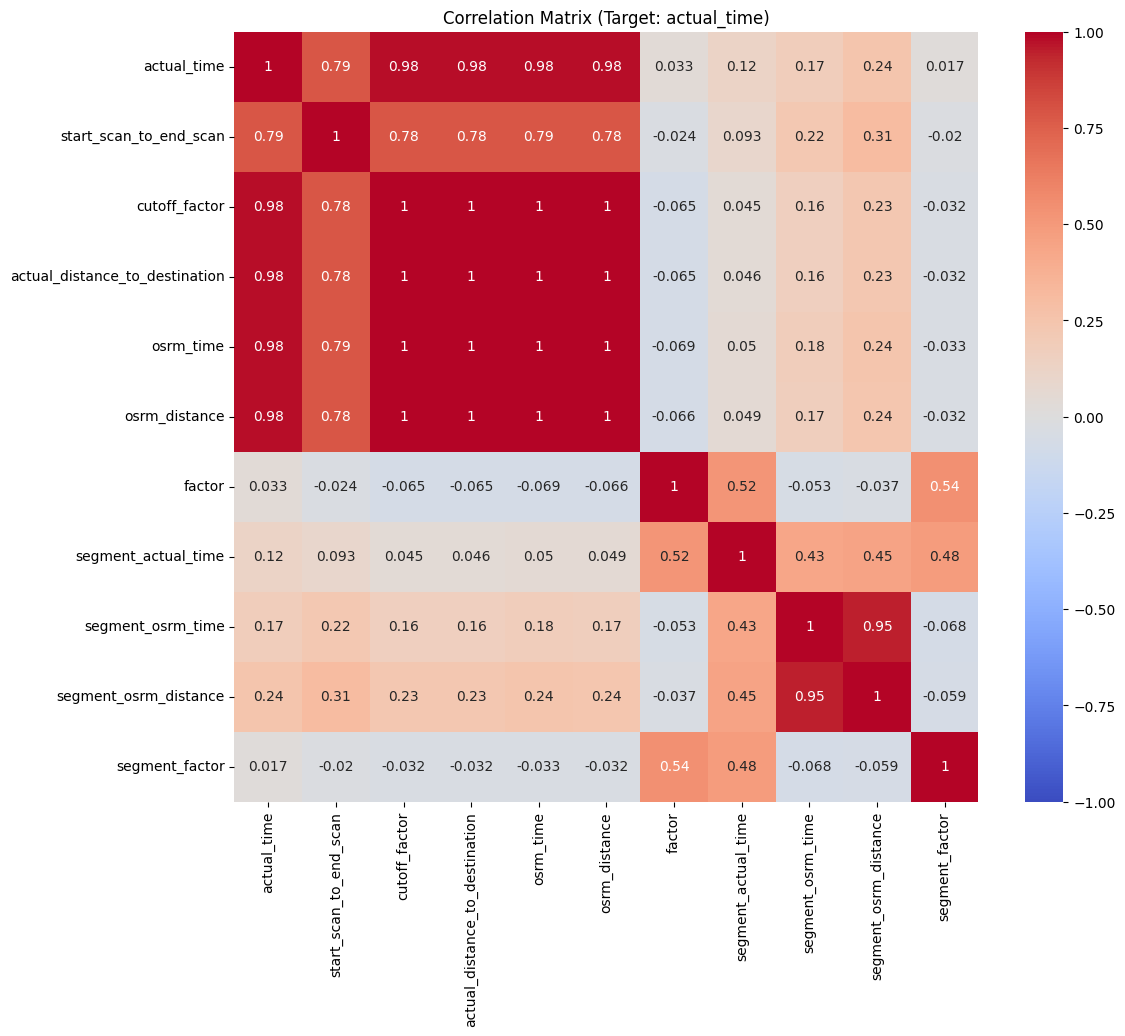

In [143]:
# Select numeric columns and calculate correlation matrix
corr_matrix = df[numeric_columns].corr()

# Reorder columns to put 'actual_time' first
columns_order = ['actual_time'] + [col for col in corr_matrix.columns if col != 'actual_time']
corr_matrix = corr_matrix.reindex(columns=columns_order, index=columns_order)

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix (Target: actual_time)')
plt.show()

Skewness of numeric features:
segment_factor                    47.336172
segment_osrm_distance             26.643163
segment_osrm_time                 19.705727
factor                            17.498068
segment_actual_time               16.820429
actual_time                        2.062382
osrm_distance                      2.042302
osrm_time                          2.039250
cutoff_factor                      1.986206
actual_distance_to_destination     1.985217
start_scan_to_end_scan             1.105346
dtype: float64


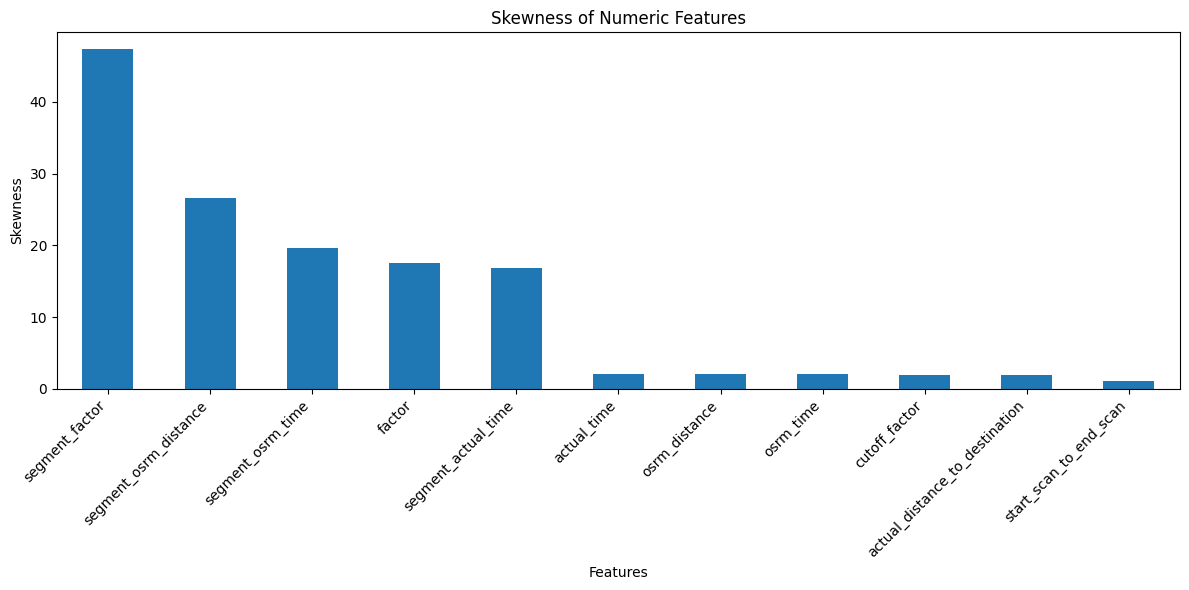

In [144]:
# Calculate skewness for numeric columns
skewness = df[numeric_columns].skew().sort_values(ascending=False)

print("Skewness of numeric features:")
print(skewness)

# Visualize skewness
plt.figure(figsize=(12, 6))
skewness.plot(kind='bar')
plt.title('Skewness of Numeric Features')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Actions taken for data cleaning and feature engineering:
 
 1. Handled outliers:
    - Used IQR method to remove outliers from all numeric columns
    - Resulted in a reduced dataset (df_clean)
 
 2. Addressed skewness:
    - Calculated and visualized skewness before and after outlier removal
 
 3. Time-based feature extraction:
    - Converted 'trip_creation_time' and 'od_start_time' to datetime format
    - Extracted hour, day name, and month name from 'trip_creation_time'
    - Calculated time difference between trip creation and start time
 
 4. Created ratio features:
    - distance_time_ratio: actual_distance_to_destination / actual_time
    - osrm_distance_time_ratio: osrm_distance / osrm_time
 
 5. Potential next steps:
    - Handle remaining skewness through transformations (e.g., log, square root)
    - Encode categorical variables
    - Normalize or standardize numeric features
    - Feature selection based on correlation analysis


In [145]:
# Handle outliers for all numeric columns
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

df_clean = remove_outliers(df, numeric_columns)

# Print the shape before and after removing outliers
print(f"Shape before removing outliers: {df.shape}")
print(f"Shape after removing outliers: {df_clean.shape}")

Shape before removing outliers: (144316, 24)
Shape after removing outliers: (73023, 24)


In [146]:
# Calculate skewness for numeric columns in df_clean
skewness_clean = df_clean[numeric_columns].skew().sort_values(ascending=False)

print("Skewness of numeric features in df_clean:")
print(skewness_clean)

Skewness of numeric features in df_clean:
start_scan_to_end_scan            3.328623
actual_time                       1.439133
cutoff_factor                     1.271800
actual_distance_to_destination    1.268572
osrm_distance                     1.167645
osrm_time                         1.122223
factor                            0.678931
segment_actual_time               0.641243
segment_factor                    0.475697
segment_osrm_time                 0.461289
segment_osrm_distance             0.299263
dtype: float64


In [147]:
# Convert 'trip_creation_time' and 'od_start_time' to datetime
df_clean['trip_creation_time'] = pd.to_datetime(df_clean['trip_creation_time'])
df_clean['od_start_time'] = pd.to_datetime(df_clean['od_start_time'])

# Extract time-based features
df_clean['creation_hour'] = df_clean['trip_creation_time'].dt.hour
df_clean['creation_day'] = df_clean['trip_creation_time'].dt.day_name()
df_clean['creation_month'] = df_clean['trip_creation_time'].dt.month_name()

# Calculate time difference between trip creation and start
df_clean['time_to_start'] = (df_clean['od_start_time'] - df_clean['trip_creation_time']).dt.total_seconds() / 3600

# Create ratio features
df_clean['distance_time_ratio'] = df_clean['actual_distance_to_destination'] / df_clean['actual_time']
df_clean['osrm_distance_time_ratio'] = df_clean['osrm_distance'] / df_clean['osrm_time']

Updated skewness of numeric features in df_clean:
start_scan_to_end_scan            3.328623
time_to_start                     3.093552
actual_time                       1.439133
cutoff_factor                     1.271800
actual_distance_to_destination    1.268572
osrm_distance                     1.167645
osrm_time                         1.122223
distance_time_ratio               0.688739
factor                            0.678931
segment_actual_time               0.641243
segment_factor                    0.475697
segment_osrm_time                 0.461289
segment_osrm_distance             0.299263
osrm_distance_time_ratio         -0.360226
dtype: float64


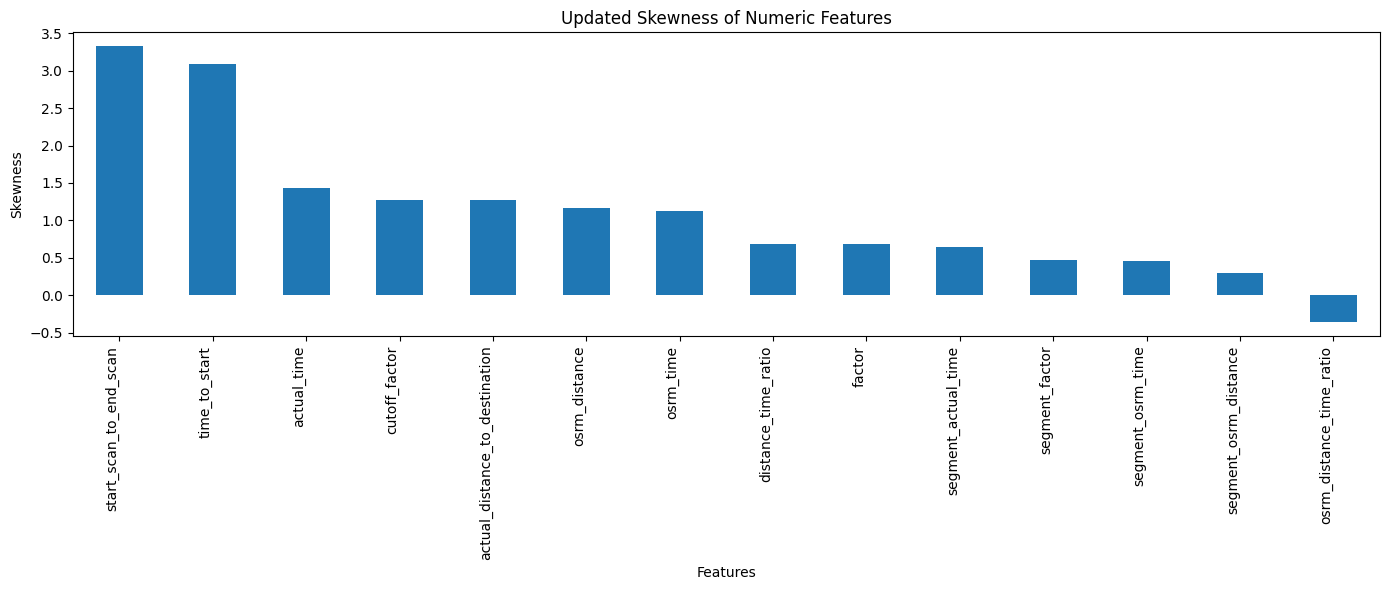

In [148]:
# Calculate skewness for numeric columns in df_clean, including the new log-transformed features
numeric_columns_updated = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
skewness_clean_updated = df_clean[numeric_columns_updated].skew().sort_values(ascending=False)

print("Updated skewness of numeric features in df_clean:")
print(skewness_clean_updated)

# Visualize updated skewness
plt.figure(figsize=(14, 6))
skewness_clean_updated.plot(kind='bar')
plt.title('Updated Skewness of Numeric Features')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [149]:
# Log transform highly skewed numerical features
skewed_features = ['start_scan_to_end_scan', 'time_to_start', 'actual_time', 
                   'cutoff_factor', 'actual_distance_to_destination', 
                   'osrm_distance', 'osrm_time']

for feature in skewed_features:
    df_clean[f'{feature}_log'] = np.log1p(df_clean[feature])

# Check skewness after transformation
skewness_after = df_clean[[f'{feature}_log' for feature in skewed_features]].skew()
print("Skewness after log transformation:")
print(skewness_after)

Skewness after log transformation:
start_scan_to_end_scan_log            0.603819
time_to_start_log                     0.632691
actual_time_log                       0.040748
cutoff_factor_log                     0.092198
actual_distance_to_destination_log    0.111794
osrm_distance_log                     0.082167
osrm_time_log                        -0.016001
dtype: float64


In [150]:
df_clean.shape


(73023, 37)

In [151]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()
df_encoded = df_clean.copy()
categorical_columns = df_encoded.select_dtypes(include=['object', 'bool']).columns.tolist()
# Apply label encoding to each categorical column
for col in categorical_columns:
    try:
        df_encoded[col] = label_encoder.fit_transform(df_encoded[col])
    except ValueError:
        print(f"Could not convert string to float in column {col}")

df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Index: 73023 entries, 0 to 144865
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   data                                73023 non-null  int32         
 1   trip_creation_time                  73023 non-null  datetime64[ns]
 2   route_schedule_uuid                 73023 non-null  int32         
 3   route_type                          73023 non-null  int32         
 4   trip_uuid                           73023 non-null  int32         
 5   source_center                       73023 non-null  int32         
 6   source_name                         73023 non-null  int32         
 7   destination_center                  73023 non-null  int32         
 8   destination_name                    73023 non-null  int32         
 9   od_start_time                       73023 non-null  datetime64[ns]
 10  od_end_time               

In [152]:
# Select features based on correlation with 'actual_time'
correlation_threshold = 0.1
corr_with_target = df_encoded.corr()['actual_time'].abs()
selected_features = corr_with_target[corr_with_target > correlation_threshold].index.tolist()
selected_features.remove('actual_time')  # Remove target variable from features

# Create final feature set
x = df_encoded[selected_features]
y = df_encoded['actual_time']
print(selected_features)

['route_type', 'start_scan_to_end_scan', 'cutoff_factor', 'actual_distance_to_destination', 'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance', 'time_to_start', 'distance_time_ratio', 'osrm_distance_time_ratio', 'start_scan_to_end_scan_log', 'actual_time_log', 'cutoff_factor_log', 'actual_distance_to_destination_log', 'osrm_distance_log', 'osrm_time_log']


# Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner

1. Data Distribution:
    - Many features show right-skewed distributions, particularly time and distance-related variables.
    - Log transformations were applied to highly skewed features to normalize their distributions.

2. Correlations:
    - Strong positive correlations observed between actual time, OSRM time, and distance-related features.
    - The 'factor' variable shows moderate positive correlations with time-related features.

3. Outliers:
    - Presence of outliers in several features, especially in time and distance variables.
    - Some extreme values may represent unusual trips or data collection errors.

4. Feature Importance:
    - Features with correlation > 0.1 with 'actual_time' were selected for modeling.
    - Key predictive features likely include OSRM estimates, distances, and derived factors.

5. Categorical Variables:
    - Categorical features like 'route_type', 'source_center', and 'destination_center' were encoded.
    - These may provide valuable information about trip characteristics and patterns.

6. Time-based Patterns:
    - Potential for time-based analysis using 'trip_creation_time' and other temporal features.
    - Could reveal patterns in traffic or demand throughout the day/week.

7. Model Considerations:
    - Given the presence of outliers and skewed distributions, robust or non-parametric models may be suitable.
    - Feature engineering, such as creating interaction terms or time-based features, could improve model performance.

8. Data Quality:
    - Some negative values in time differences (e.g., 'segment_actual_time') suggest potential data quality issues.
    - Further investigation and cleaning of these anomalies may be necessary.

9. Actionable Insights:
    - Develop separate models for different route types or time periods to capture specific patterns.
    - Incorporate external data (e.g., weather, events) to explain outliers and improve predictions.
    - Implement a robust outlier detection and handling strategy in the modeling pipeline.
    - Consider using ensemble methods to capture complex relationships in the data.


In [153]:
df_encoded.shape

(73023, 37)

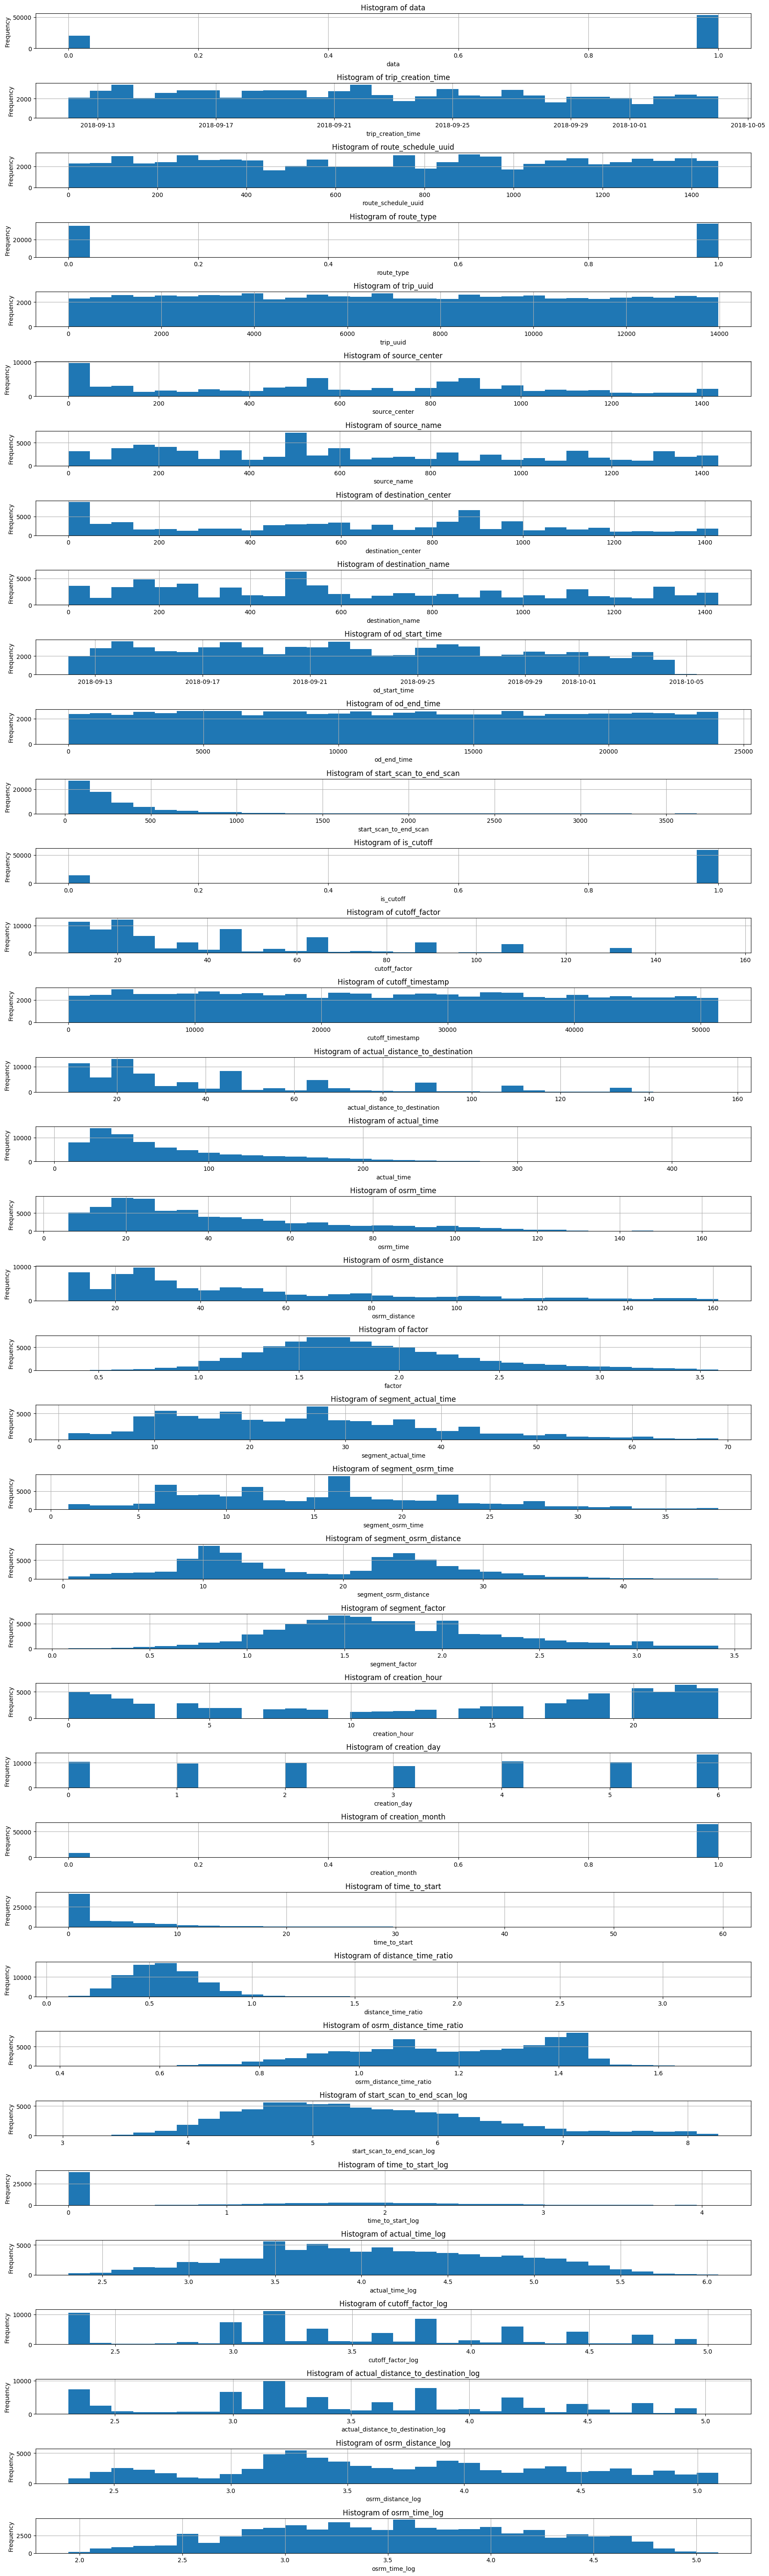

In [154]:
fig, axes = plt.subplots(37, 1, figsize=(18, 60))

for i, c in enumerate(df_encoded.columns):
    df_encoded[c].hist(ax=axes[i], bins=30)
    axes[i].set_title(f'Histogram of {c}')
    axes[i].set_xlabel(c)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Formulating at least 3 hypothesis about this data

1. **Hypothesis on Delivery Time Efficiency**: 
   - **H1**: There is a significant positive correlation between the distance to the destination and the actual delivery time. Longer distances will lead to longer delivery times due to increased travel time and potential delays.

2. **Hypothesis on Route Type Impact**: 
   - **H2**: Different route types (e.g., express vs. standard) significantly affect the actual delivery time. Express routes will have shorter delivery times compared to standard routes due to prioritized handling and fewer stops.

3. **Hypothesis on Time of Day Influence**: 
   - **H3**: The time of day when a trip is created (e.g., peak hours vs. off-peak hours) has a significant impact on the actual delivery time. Deliveries initiated during peak hours will take longer due to increased traffic congestion compared to those initiated during off-peak hours.

# Formal significance test for one of the hypotheses

In [155]:
import scipy.stats as stats

# Hypothesis to test: H1 - There is a significant positive correlation between the distance to the destination and the actual delivery time.
# Null Hypothesis: There is no correlation between the distance to the destination and the actual delivery time.

# Extracting relevant columns
distance = df_encoded['actual_distance_to_destination']
delivery_time = df_encoded['actual_time']

# Calculating Pearson correlation coefficient and p-value
correlation, p_value = stats.pearsonr(distance, delivery_time)

print(f"Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

# Interpreting the results
if p_value < 0.05:
    print("Reject the null hypothesis. There is a statistically significant positive correlation between the distance to the destination and the actual delivery time.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant correlation between the distance to the destination and the actual delivery time.")


Correlation Coefficient: 0.8931428228145455
P-value: 0.0
Reject the null hypothesis. There is a statistically significant positive correlation between the distance to the destination and the actual delivery time.


# Suggestions for next steps in analyzing this data
1. Data Preprocessing: Check for missing values, outliers, and data types. Handle them accordingly.
2. Feature Engineering: Create new features that might be useful for the analysis.
3. Exploratory Data Analysis (EDA): Visualize the data to understand the distribution, relationships, and patterns.
4. Statistical Analysis: Perform statistical tests to validate the hypotheses.
5. Model Building: Build predictive models to forecast delivery time.
6. Model Evaluation: Evaluate the models using appropriate metrics.
7. Model Deployment: Deploy the best model for real-time predictions.
8. Continuous Monitoring: Monitor the model's performance and update it if necessary.

# Summary of the dataset

The quality of this dataset appears to be good, with a large sample size of over 144,000 records and a diverse range of features. The data seems to be well-structured and clean, with no obvious errors or inconsistencies. However, to further improve the analysis and modeling, it would be beneficial to have additional data on external factors that might influence delivery times, such as weather conditions, traffic patterns, and road closures. This additional data could help to increase the accuracy of predictions and provide a more comprehensive understanding of the factors affecting delivery times.
